## Final Project Submission


* Student name: JASWINDER SINGH
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Hardik idnani
* BUSINESS PROBLEM : the stakeholder is expecting a posetive relationship between all the important attributes of the houses and the price.


# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

# IMPORTING DATA

In [2]:
data=pd.read_csv('kc_house_data.csv')

## taking first look at data and understanding

In [3]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
# cleaning data and dropping unnecessary columns
data.isna().sum()
data=data.drop(['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15','waterfront'],axis=1)

# assumptions:
* normality: our data is looking to be normal, but to make sure, we will create visuals of every independent variable.
* linearity: the data is supposed to be linear,though we will remove some outliers if present
* Multicollinearity: as the data set is about the price of houses against the features of house, the Multicollinearity is * not supposed to be present as the dependent variable follows different independent variables
* Autocorrelation: we are assuming the this is not present in the data

In [5]:
data.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000


In [7]:
# removing outliers, only considering the cases where the price is between 30000 and 700000 as it falls in the majority of the data
data = data.astype({'price':'int'})
data=data[(data['price'] >= 300000) & (data['price'] <= 700000)]

In [8]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,1.000000,0.041012,0.001205,0.038139,0.025295,-0.145108,0.036880,-0.046310,0.050729,0.025829
price,0.041012,1.000000,0.133458,0.210216,0.330074,0.060274,0.098756,0.059382,0.361308,-0.044638
bedrooms,0.001205,0.133458,1.000000,0.446571,0.572897,0.019763,0.073894,0.024514,0.205709,0.136699
bathrooms,0.038139,0.210216,0.446571,1.000000,0.644385,0.025689,0.464352,-0.159436,0.517827,0.582732
sqft_living,0.025295,0.330074,0.572897,0.644385,1.000000,0.132691,0.226658,-0.070331,0.552788,0.347224
sqft_lot,-0.145108,0.060274,0.019763,0.025689,0.132691,1.000000,-0.051319,0.027309,0.038840,0.022745
floors,0.036880,0.098756,0.073894,0.464352,0.226658,-0.051319,1.000000,-0.310970,0.419620,0.551684
condition,-0.046310,0.059382,0.024514,-0.159436,-0.070331,0.027309,-0.310970,1.000000,-0.219287,-0.382615
grade,0.050729,0.361308,0.205709,0.517827,0.552788,0.038840,0.419620,-0.219287,1.000000,0.537574
yr_built,0.025829,-0.044638,0.136699,0.582732,0.347224,0.022745,0.551684,-0.382615,0.537574,1.000000


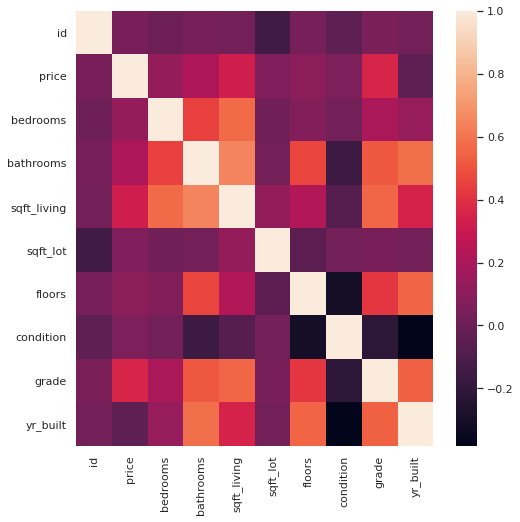

In [9]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(data.corr());

In [10]:
data_corrs = data.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

price          1.000000
grade          0.361308
sqft_living    0.330074
bathrooms      0.210216
bedrooms       0.133458
floors         0.098756
sqft_lot       0.060274
condition      0.059382
yr_built       0.044638
id             0.041012
Name: price, dtype: float64

#### here, we can see that the high correlation is shown by grade, sqft_living. but, to make it warking model for real life, we'll consider number of bedrooms and bathrooms as well

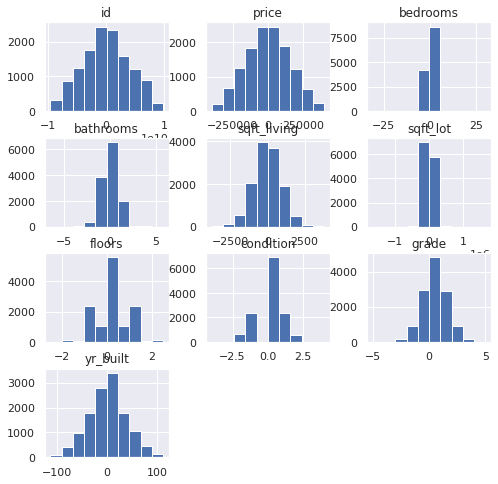

In [11]:
data.diff().hist();

# creating first model

In [12]:

data=pd.read_csv('kc_house_data.csv')
data=data.drop(['id','grade','condition','date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15','waterfront'],axis=1)
data
x=data.drop(['price'],axis=1)
y=data['price']
X = sm.add_constant(x)

model = sm.OLS(y,x)
fitted_model = model.fit()
fitted_model.summary()


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          1.952e+04
Date:                Sun, 29 May 2022   Prob (F-statistic):                        0.00
Time:                        10:35:39   Log-Likelihood:                     -2.9974e+05
No. Observations:               21597   AIC:                                  5.995e+05
Df Residuals:                   21591   BIC:                                  5.995e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms     -5.63e+04   2357.316    -23.882      0.000   -6.09e+04   -5.17e+04
bathrooms    6685.3449   3837.541      1.742      0.082    -836.518    1.42e+04
sqft_living   314.0643      3.152     99.628      0.000     307.885     320.243
sqft_lot       -0.3728      0.043     -8.606      0.000      -0.458      -0.288
floors       2234.4329   3817.106      0.585      0.558   -5247.376    9716.242
yr_built       32.4664      4.014      8.088      0.000      24.599      40.334
==============================================================================
Omnibus:                    14201.215   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           468535.936
Skew:                           2.683   Prob(JB):                         0.00
Kurtosis:                      25.178   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


as we can see that the coef.. are in quite better range as compared to previous models.
the r-squared value is great
the coef_ for bedroom is in negative, whihc means that it is negatively realted to our target variable.
all our coef_ are high, which somewhat validates the model

In [13]:
y_pred=fitted_model.predict(x)
y_pred

0        271986.897596
1        718404.072377
2        197182.858022
3        474596.574756
4        435837.486860
             ...      
21592    399844.014079
21593    584698.631150
21594    281953.928160
21595    418963.179223
21596    282023.600537
Length: 21597, dtype: float64

In [14]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

# as the differnce between predicted and actual values are much high, this model is not valid
* also, the coef_ values are not in significant range.
* the p-value score is great, but as the other attributes are not in optimum condition. this model is rejected

## removing another variable from same model

In [15]:
data=pd.read_csv('kc_house_data.csv')
data=data.drop(['id','grade','condition','date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15','waterfront'],axis=1)
data
x=data.drop(['price','bedrooms'],axis=1)
y=data['price']
X = sm.add_constant(x)

model = sm.OLS(y,x)
fitted_model = model.fit()
fitted_model.summary()


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          2.271e+04
Date:                Sun, 29 May 2022   Prob (F-statistic):                        0.00
Time:                        10:35:39   Log-Likelihood:                     -3.0002e+05
No. Observations:               21597   AIC:                                  6.001e+05
Df Residuals:                   21592   BIC:                                  6.001e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -7752.5691   3839.263     -2.019      0.043   -1.53e+04    -227.330
sqft_living   288.0573      2.997     96.113      0.000     282.183     293.932
sqft_lot       -0.2875      0.044     -6.575      0.000      -0.373      -0.202
floors        1.24e+04   3842.964      3.228      0.001    4872.210    1.99e+04
yr_built      -29.2667      3.111     -9.407      0.000     -35.365     -23.169
==============================================================================
Omnibus:                    14629.374   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           525382.284
Skew:                           2.777   Prob(JB):                         0.00
Kurtosis:                      26.516   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y_pred=fitted_model.predict(x)
y_pred

0        285718.861847
1        688491.830797
2        167008.457931
3        494792.657631
4        420359.708087
             ...      
21592    399438.440673
21593    610225.873314
21594    253628.533698
21595    406982.652042
21596    253736.584662
Length: 21597, dtype: float64

In [17]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

### the values are not close to each other.

# second model

In [18]:
data=pd.read_csv('kc_house_data.csv')
data.isna().sum()
data=data.drop(['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15','waterfront'],axis=1)
x=data.drop(['price'],axis=1)
y=data['price']

In [19]:
# removing outliers, only considering the cases where the price is between 30000 and 700000 as it falls in the majority of the data
data = data.astype({'price':'int'})
data=data[(data['price'] >= 300000) & (data['price'] <= 700000)]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                test_size=0.33,
                                                random_state=42)

In [21]:
model1=LinearRegression()
model1=model1.fit(x_train,y_train)

In [22]:
model1.coef_

array([-2.29025909e-06, -5.12971820e+04,  5.87523832e+04,  1.83726825e+02,
       -3.27830585e-01,  2.06060871e+04,  2.16935350e+04,  1.33939599e+05,
       -4.09190776e+03])

In [23]:
model1.intercept_

7157370.4574735025

In [24]:
model1.score(x_train,y_train)

0.6235350336580254

In [25]:
x_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
3686,6303401050,3,0.75,850,8573,1.0,3,6,1945
10247,1995200200,3,1.00,1510,6083,1.0,4,6,1940
4037,1423089118,4,2.25,1790,42000,1.0,3,7,1983
3437,9349900110,2,1.50,1140,2500,1.0,3,7,1988
19291,455000395,3,1.00,1500,3920,1.0,3,7,1947
...,...,...,...,...,...,...,...,...,...
17525,3956100050,4,2.50,2770,21806,2.0,3,9,1991
5761,7893202340,4,2.25,2280,7500,1.0,4,7,1963
18907,3083001095,3,1.75,1760,3520,1.0,3,7,1966
12348,8099600160,3,2.00,1710,10959,1.0,4,7,1981


In [26]:
model1.score(x_test,y_test)

0.6055665685711678

In [27]:
y_pred=model1.predict(x_test)
y_pred

array([117027.77672846, 305811.84525172, 305228.2752753 , ...,
       400013.18535947, 351901.81509789, 702769.86238808])

In [28]:
y_test

3686     132500.0
10247    415000.0
4037     494000.0
3437     355000.0
19291    606000.0
           ...   
17525    533300.0
5761     335000.0
18907    410000.0
12348    488500.0
3448     735000.0
Name: price, Length: 7128, dtype: float64

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred)

145007.94948066707

In [30]:
r2_score(y_test,y_pred)

0.6055665685711678

# cross validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores=cross_val_score(model1,x_train,y_train,scoring ='r2',cv=10)
scores

array([0.63328306, 0.6415828 , 0.60126627, 0.61966494, 0.63236141,
       0.62904708, 0.63935869, 0.59642525, 0.61925961, 0.58933415])

In [33]:
np.mean(scores)

0.6201583256018426

In [34]:
# getting score for test set
from sklearn.model_selection import cross_val_predict

In [35]:
pred=cross_val_predict(model1,x_test,y_test)
pred

array([128045.3230117 , 306641.00414515, 304155.89227364, ...,
       401406.06342291, 359243.52475701, 669289.32982669])

In [36]:
score_test=cross_val_score(model1,x_test,y_test,cv=10)
score_test

array([0.59927559, 0.58805898, 0.59961711, 0.56067266, 0.59306754,
       0.62576355, 0.59992197, 0.60798291, 0.60384164, 0.64213547])

In [37]:
np.mean(score_test)

0.6020337410665545

<AxesSubplot:xlabel='price'>

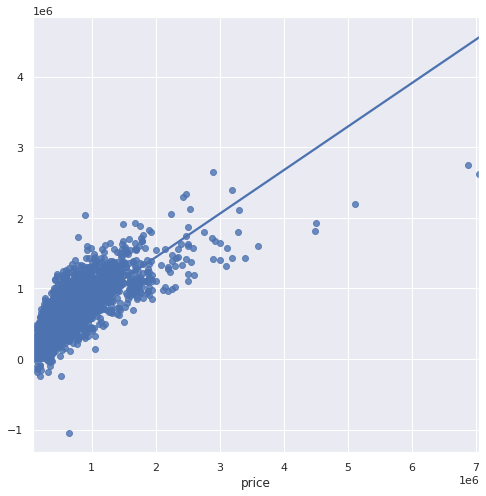

In [38]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

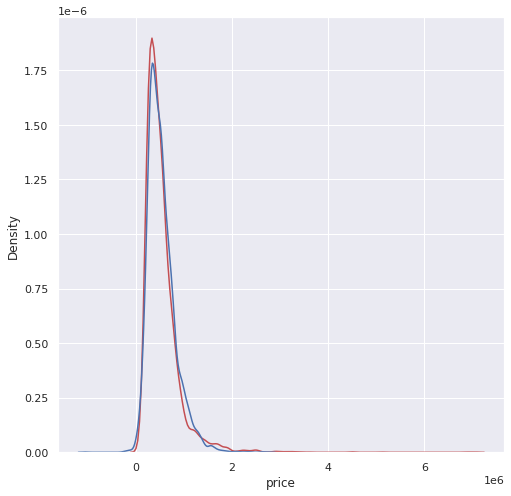

In [39]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### this visual is suggesting that this model is fitting properly to the data as most of the values are separted evenly the half data

#### as the difference between train set score and test set score is very small, this model is neither overfit nor underfit


 # as we can see that, the difference between predicted and actual value is really low. this model is somewhat valid

# discussing the second model :
* in the final model, we have the coefficients with high posetive and low negative vlues, which show that the model is promising.
* the visual show the linearity of regression and the worthyness of predicted values.
* the score validaton of the model is better
* and the mean absolute error for train, test and pridcted set is almost same.

# observatons based on the final model
* the number of bedrooms are not contributing in the price
* the older the house, the more the price
* renovation has posetive impact on the price
* condition of the house is also important factor